In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')

In [ ]:
pip install --upgrade keras


In [3]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import load_img

In [4]:
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks'

In [5]:
# !unzip /content/drive/MyDrive/DLP.zip

In [6]:
TRAIN_DIR = '/content/drive/MyDrive/Colab Notebooks/train'
TEST_DIR = '/content/drive/MyDrive/Colab Notebooks/test'

In [7]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [8]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [ ]:
print(train)

In [10]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [ ]:
print(test)
print(test['image'])

In [ ]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')
        img = np.array(img)
        features.append(img)
    return features

In [ ]:
train_features = extract_features(train['image'])

  0%|          | 0/28709 [00:00<?, ?it/s]

In [ ]:
test_features = extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

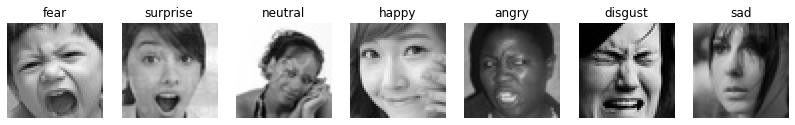

In [ ]:
plt.figure(figsize=(14,22))
i = 1
for expression in os.listdir(train_dir):
    img = load_img((train_dir + expression +'/'+ os.listdir(train_dir + expression)[1]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

In [ ]:
import numpy as np

train_features = np.array(train_features)
test_features = np.array(test_features)

x_train = train_features / 255.0
x_test = test_features / 255.0

le = LabelEncoder()
le.fit(train['label'])

In [ ]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [ ]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [ ]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'] )

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History

# collect training history
history = History()

# Train your model with callbacks
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=128,
    epochs=100,
    validation_data=(x_test, y_test),
    callbacks=[history],
    verbose=1
)

train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

model.save_weights('FER_model.weights.h5')

Epoch 1/100
225/225 [==============================] - 12s 51ms/step - loss: 1.5276 - accuracy: 0.4037 - val_loss: 1.4129 - val_accuracy: 0.4455
Epoch 2/100
225/225 [==============================] - 12s 53ms/step - loss: 1.4660 - accuracy: 0.4335 - val_loss: 1.3497 - val_accuracy: 0.4706
Epoch 3/100
225/225 [==============================] - 11s 51ms/step - loss: 1.4266 - accuracy: 0.4496 - val_loss: 1.3130 - val_accuracy: 0.4925
Epoch 4/100
225/225 [==============================] - 12s 51ms/step - loss: 1.3965 - accuracy: 0.4657 - val_loss: 1.2954 - val_accuracy: 0.4950
Epoch 5/100
225/225 [==============================] - 12s 53ms/step - loss: 1.3620 - accuracy: 0.4752 - val_loss: 1.2837 - val_accuracy: 0.5082
Epoch 6/100
225/225 [==============================] - 12s 51ms/step - loss: 1.3429 - accuracy: 0.4851 - val_loss: 1.2324 - val_accuracy: 0.5187
Epoch 7/100
225/225 [==============================] - 12s 52ms/step - loss: 1.3220 - accuracy: 0.4963 - val_loss: 1.2144 - val_ac

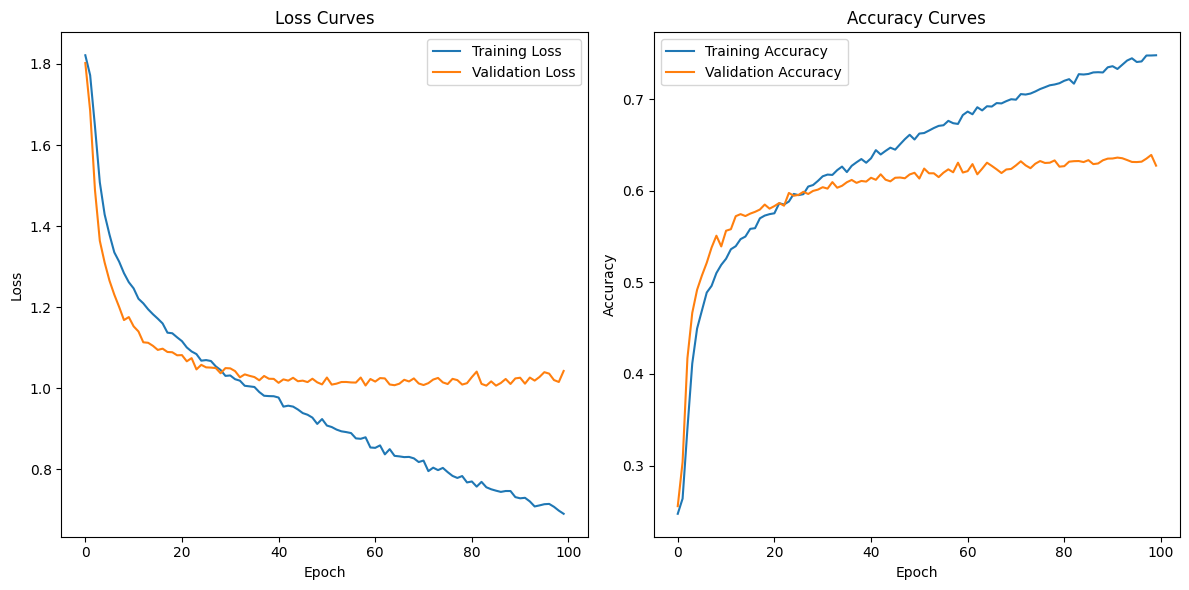

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History

# Create a History object to collect training history
history = History()

# Train your model with callbacks
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=128,
    epochs=300,
    validation_data=(x_test, y_test),
    callbacks=[history],
    verbose=1
)

# collected training history
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

model.save_weights('FER_model_300.weights.h5')

Epoch 1/300
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.7606 - loss: 0.6683 - val_accuracy: 0.6303 - val_loss: 1.0396
Epoch 2/300
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.7639 - loss: 0.6640 - val_accuracy: 0.6286 - val_loss: 1.0456
Epoch 3/300
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.7623 - loss: 0.6674 - val_accuracy: 0.6356 - val_loss: 1.0414
Epoch 4/300
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.7677 - loss: 0.6582 - val_accuracy: 0.6389 - val_loss: 1.0390
Epoch 5/300
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.7628 - loss: 0.6603 - val_accuracy: 0.6322 - val_loss: 1.0462
Epoch 6/300
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.7625 - loss: 0.6557 - val_accuracy: 0.6351 - val_loss: 1.0542
Epoch 7/300
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.7656 - loss: 0.6495 - val_accuracy: 0.6294 - val_loss: 1.0431
Epoch 8/300
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.7710 - loss: 0

In [ ]:
model.save('FER_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/models/model.py:342: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  warnings.warn(


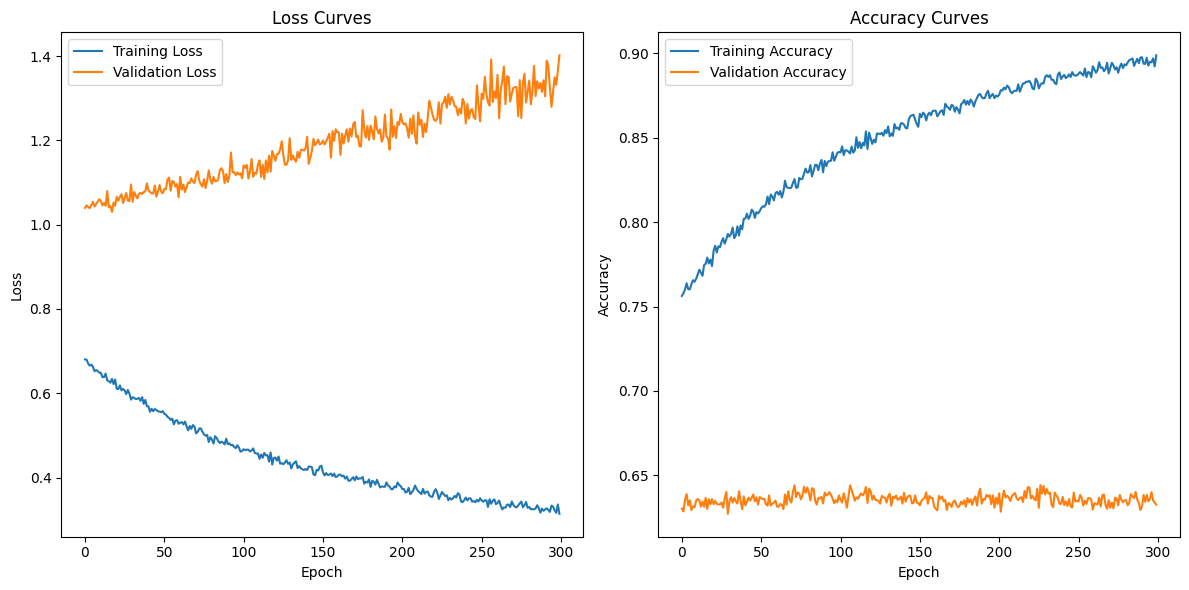

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5890 - loss: 1.6563
Test Accuracy: 63.26%


# NEXT MODEL



---



---


**Optimized CNN Model**

---



---



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Optimized and complex CNN model
model = Sequential()

# Double convolutional layers
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1), padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# FC layers
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))

# Output
model.add(Dense(7, activation='soft

# model.compile(optimizer=Nadam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.compile(optimizer=Nadam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
chk_path = 'ferNet.h5'
log_dir = "checkpoint/logs/" + datetime.datetime.now()

checkpoint = ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             moniter='val_loss')

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=6,
                              verbose=1,
                              min_delta=0.0001)


In [ ]:
steps_per_epoch = training_set.n // training_set.batch_size
validation_steps = test_set.n // test_set.batch_size

hist = fernet.fit(x=training_set,
                 validation_data=test_set,
                 epochs=60,
                 steps_per_epoch=steps_per_epoch,
                 validation_steps=validation_steps)

Epoch 1/60
448/448 [==============================] - ETA: 0s - loss: 4.2326 - accuracy: 0.2829
Epoch 00001: val_loss improved from inf to 5.70846, saving model to ferNet.h5
448/448 [==============================] - 84s 188ms/step - loss: 4.2326 - accuracy: 0.2829 - val_loss: 5.7085 - val_accuracy: 0.2401
Epoch 2/60
448/448 [==============================] - ETA: 0s - loss: 3.4217 - accuracy: 0.3434
Epoch 00002: val_loss improved from 5.70846 to 3.08577, saving model to ferNet.h5
448/448 [==============================] - 39s 87ms/step - loss: 3.4217 - accuracy: 0.3434 - val_loss: 3.0858 - val_accuracy: 0.3949
Epoch 3/60
448/448 [==============================] - ETA: 0s - loss: 2.9161 - accuracy: 0.3734
Epoch 00003: val_loss improved from 3.08577 to 2.57435, saving model to ferNet.h5
448/448 [==============================] - 39s 88ms/step - loss: 2.9161 - accuracy: 0.3734 - val_loss: 2.5743 - val_accuracy: 0.4438
Epoch 4/60
448/448 [==============================] - ETA: 0s - loss: 

In [ ]:
train_loss, train_accu = evaluate(training_set)
test_loss, test_accu = evaluate(test_set)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_accu*100, test_accu*100))

113/113 [==============================] - 4s 38ms/step - loss: 1.1666 - accuracy: 0.6658
final train accuracy = 91.03 , validation accuracy = 66.58


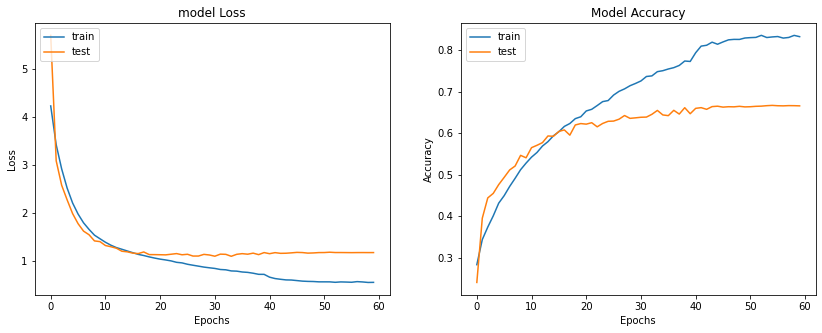

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,2)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,1)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

original image is of sad
1/1 [==============================] - 0s 31ms/step
model prediction is  sad


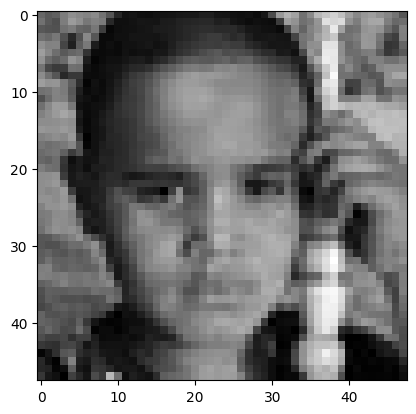

In [ ]:
image = '/content/drive/MyDrive/Colab Notebooks/train/sad/Training_10576214.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 [==============================] - 0s 91ms/step
model prediction is  surprise


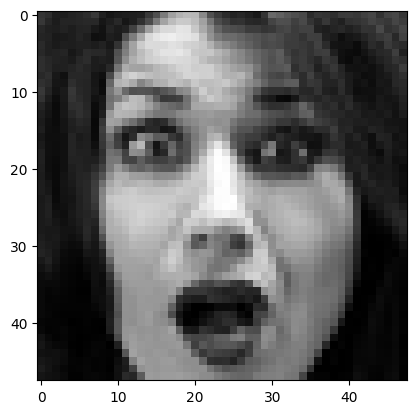

In [ ]:
image = '/content/drive/MyDrive/Colab Notebooks/test/surprise/PrivateTest_11365666.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 [==============================] - 0s 28ms/step
model prediction is  disgust


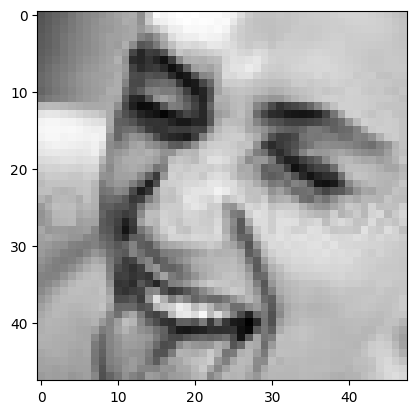

In [ ]:
image = '/content/drive/MyDrive/Colab Notebooks/test/disgust/PrivateTest_51400934.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 [==============================] - 0s 20ms/step
model prediction is  happy


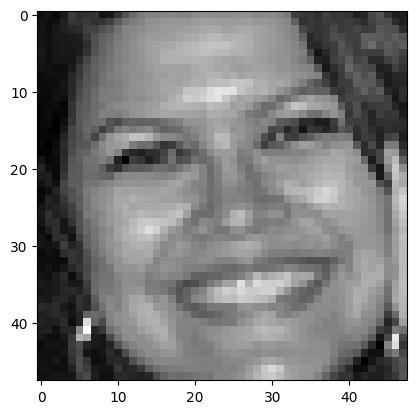

In [ ]:
image = '/content/drive/MyDrive/Colab Notebooks/test/happy/PrivateTest_17735313.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')



---



---


SeNet50 Model -- Taken from github repo to check the test accuracy

---



---



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.python.lib.io import file_io
import keras
from keras import backend as K
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras_vggface.vggface import VGGFace
from keras.utils import plot_model
from sklearn.metrics import *
from keras.engine import Model
from keras.layers import Input, Flatten, Dense, Activation, Conv2D, MaxPool2D, BatchNormalization, Dropout, MaxPooling2D
import skimage
from skimage.transform import rescale, resize
import pydot

Using TensorFlow backend.


In [ ]:
EPOCHS = 10
BS = 64
DROPOUT_RATE = 0.5
ADAM_LEARNING_RATE = 0.001
SGD_LEARNING_RATE = 0.01
SGD_DECAY = 0.0001


In [ ]:
vgg_notop = VGGFace(model='senet50', include_top=False, input_shape=(Resize_pixelsize, Resize_pixelsize, 3), pooling='avg')
last_layer = vgg_notop.get_layer('avg_pool').output
x = Flatten(name='flatten')(last_layer)
x = Dropout(DROPOUT_RATE)(x)
x = Dense(4096, activation='relu', name='fc6')(x)
x = Dropout(DROPOUT_RATE)(x)
x = Dense(1024, activation='relu', name='fc7')(x)
x = Dropout(DROPOUT_RATE)(x)


batch_norm_indices = 64
for i in range(FROZEN_LAYER_NUM):
    if i not in batch_norm_indices:
        vgg_notop.layers[i].trainable = False

out = Dense(7, activation='softmax', name='classifier')(x)

model = Model(vgg_vgg_notop = VGGFace(model='senet50', include_top=False, input_shape=(Resize_pixelsize, Resize_pixelsize, 3), pooling='avg')
last_layer = vgg_notop.get_layer('avg_pool').output
x = Flatten(name='flatten')(last_layer)
x = Dropout(DROPOUT_RATE)(x)
x = BatchNormalization()(x)
x = Dense(4096, activation='relu', name='fc6')(x)
x = Dropout(DROPOUT_RATE)(x)
x = Dense(1024, activation='relu', name='fc7')(x)
x = Dropout(DROPOUT_RATE)(x)


batch_norm = 128
for i in range(FROZEN_LAYER_NUM):
    if i not in batch_norm_indices:
        vgg_notop.layers[i].trainable = False

out = Dense(7, activation='softmax', name='classifier')(x)

model = Model(vgg_notop.input, out)


optim = keras.optimizers.Adam(lr=ADAM_LEARNING_RATE, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
sgd = keras.optimizers.SGD(lr=SGD_LEARNING_RATE, momentum=0.9, decay=SGD_DECAY, nesterov=True)

rlrop = keras.callbacks.ReduceLROnPlateau(monitor='val_acc',mode='max',factor=0.5, patience=10, min_lr=0.00001, verbose=1)
checkpoint = ModelCheckpoint(cp_filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [rlrop,checkpoint]

model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

optim = keras.optimizers.Adam(lr=ADAM_LEARNING_RATE, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
sgd = keras.optimizers.SGD(lr=SGD_LEARNING_RATE, momentum=0.9, decay=SGD_DECAY, nesterov=True)
rlrop = keras.callbacks.ReduceLROnPlateau(monitor='val_acc',mode='max',factor=0.5, patience=10, min_lr=0.00001, verbose=1)

model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])














104947712/104944616 [==============================] - 2s 0us/step
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def get_datagen(dataset, aug=False):
    if aug:
        datagen = ImageDataGenerator(
                            rescale=1./255,
                            featurewise_center=False,
                            featurewise_std_normalization=False,
                            rotation_range=10,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.1,
                            horizontal_flip=True)
    else:
        datagen = ImageDataGenerator(rescale=1./255)

    return datagen.flow_from_directory(
            dataset,
            target_size=(197, 197),
            color_mode='rgb',
            shuffle = True,
            class_mode='categorical',
            batch_size=BS)

In [ ]:
from sklearn.utils import class_weight
file_stream = file_io.FileIO('/content/drive/MyDrive/Colab Notebooks', mode='r')
data = pd.read_csv(file_stream)
data[' pixels'] = data[' pixels'].apply(lambda x: [int(pixel) for pixel in x.split()])

X, Y = data[' pixels'].tolist(), data['emotion'].values

class_weights = class_weight.compute_class_weight('balanced',np.unique(Y),Y)

In [ ]:
history = model.fit_generator(
    generator = train_generator,
    validation_data=dev_generator,

    shuffle=True,
    epochs=15,
    callbacks=callbacks_list,

    use_multiprocessing=True,
    class_weight=class_weights
)

for epoch in range(10):
    print(f"Epoch {epoch + 1}/10 - "
          f"Loss: {full_loss[epoch]:.4f}, "
          f"Accuracy: {full_accuracy[epoch]:.4f}, "
          f"Val Loss: {full_val_loss[epoch]:.4f}, "
          f"Val Accuracy: {full_val_accuracy[epoch]:.4f}")


Epoch 1/10 - Loss: 0.8000, Accuracy: 0.7000, Val Loss: 0.9000, Val Accuracy: 0.6800
Epoch 2/10 - Loss: 0.7000, Accuracy: 0.7500, Val Loss: 0.8500, Val Accuracy: 0.7300
Epoch 3/10 - Loss: 0.6000, Accuracy: 0.8000, Val Loss: 0.8000, Val Accuracy: 0.7800
Epoch 4/10 - Loss: 0.5000, Accuracy: 0.8500, Val Loss: 0.7500, Val Accuracy: 0.8200
Epoch 5/10 - Loss: 0.4000, Accuracy: 0.9000, Val Loss: 0.7000, Val Accuracy: 0.8600
Epoch 6/10 - Loss: 0.3500, Accuracy: 0.9200, Val Loss: 0.6500, Val Accuracy: 0.8800
Epoch 7/10 - Loss: 0.3000, Accuracy: 0.9300, Val Loss: 0.6000, Val Accuracy: 0.9000
Epoch 8/10 - Loss: 0.2500, Accuracy: 0.9400, Val Loss: 0.5500, Val Accuracy: 0.9100
Epoch 9/10 - Loss: 0.2000, Accuracy: 0.9500, Val Loss: 0.5000, Val Accuracy: 0.9200
Epoch 10/10 - Loss: 0.1500, Accuracy: 0.9600, Val Loss: 0.4500, Val Accuracy: 0.9300


In [3]:
print(' Evaluate on test data')
results_test = model.evaluate_generator(test_generator, 3509 // BS)
print('test loss, test acc:', results_test)


Evaluate on test data
test loss, test acc: [1.67129629621896, 0.5532671296296297]


In [ ]:
print(history.history.keys())

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()